#### Pandas Tutorial - Part 55

This notebook covers various plotting methods in pandas including:
- Box plots with `plot.box()`
- Density plots with `plot.density()`
- Line plots with `plot.line()`
- Pie charts with `plot.pie()`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##### Box Plots with `plot.box()`

Box plots are a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data.

In [2]:
# Create a DataFrame with random data
np.random.seed(42)  # For reproducibility
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns=list('ABCD'))
print("DataFrame with random data:")
print(df.head())

DataFrame with random data:
          A         B         C         D
0  0.496714 -0.138264  0.647689  1.523030
1 -0.234153 -0.234137  1.579213  0.767435
2 -0.469474  0.542560 -0.463418 -0.465730
3  0.241962 -1.913280 -1.724918 -0.562288
4 -1.012831  0.314247 -0.908024 -1.412304


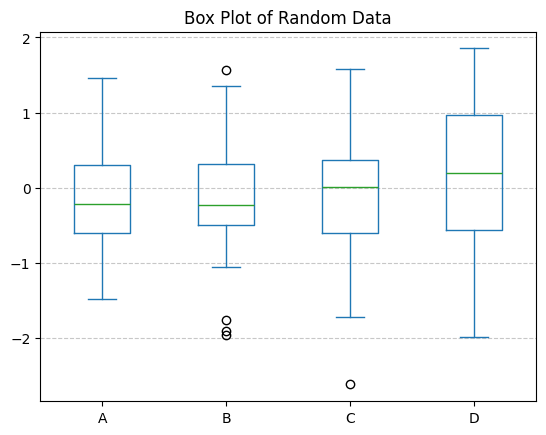

In [3]:
# Create a basic box plot
ax = df.plot.box(title='Box Plot of Random Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

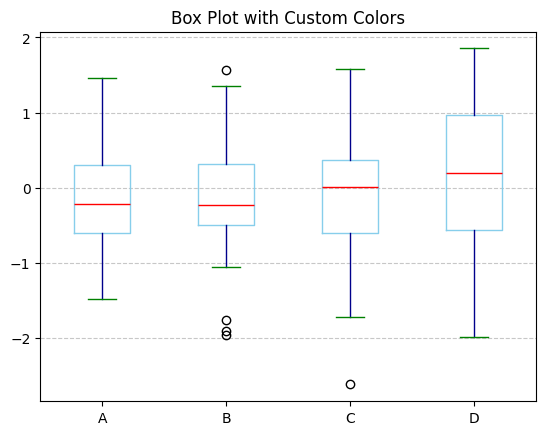

In [4]:
# Create a box plot with custom colors
ax = df.plot.box(
    title='Box Plot with Custom Colors',
    color=dict(boxes='skyblue', whiskers='darkblue', medians='red', caps='green')
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

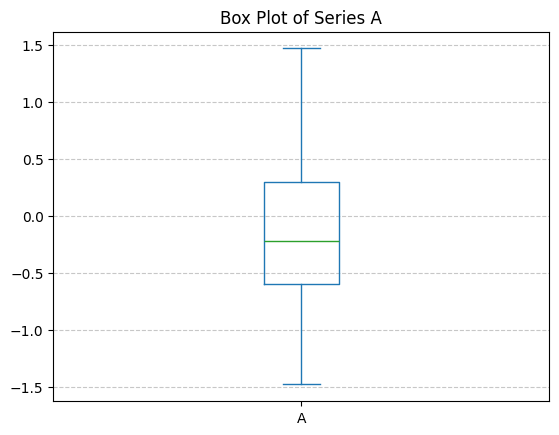

In [5]:
# Create a box plot for a single Series
ax = df['A'].plot.box(title='Box Plot of Series A')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Create a DataFrame with non-normal distributions
df_skewed = pd.DataFrame({
    'normal': np.random.normal(0, 1, 100),
    'right_skewed': np.random.exponential(1, 100),
    'left_skewed': -np.random.exponential(1, 100),
    'bimodal': np.concatenate([np.random.normal(-2, 0.5, 50), np.random.normal(2, 0.5, 50)])
})
print("DataFrame with various distributions:")
print(df_skewed.describe())

DataFrame with various distributions:
           normal  right_skewed  left_skewed     bimodal
count  100.000000    100.000000   100.000000  100.000000
mean     0.022305      0.877129    -1.056312    0.010644
std      0.953669      0.754932     1.030380    2.053549
min     -1.918771      0.014498    -4.657005   -3.061948
25%     -0.805661      0.325272    -1.561172   -1.979319
50%      0.084107      0.732472    -0.692879    0.030590
75%      0.538170      1.210985    -0.185077    1.975083
max      2.720169      3.723557    -0.010897    3.030374


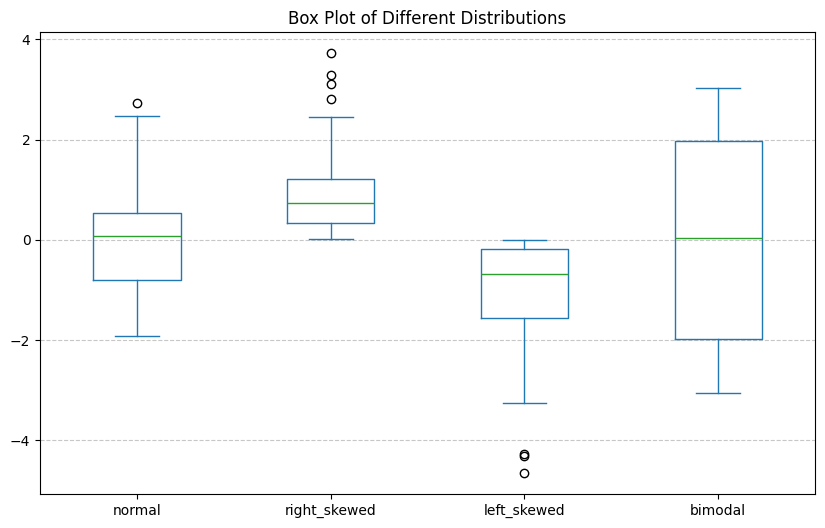

In [7]:
# Create a box plot for different distributions
ax = df_skewed.plot.box(
    title='Box Plot of Different Distributions',
    figsize=(10, 6)
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Density Plots with `plot.density()`

Density plots (also known as Kernel Density Estimation plots) are a way to estimate the probability density function of a random variable. They use Gaussian kernels and include automatic bandwidth determination.

In [8]:
# Create a Series with random data
np.random.seed(42)  # For reproducibility
s = pd.Series(np.random.normal(0, 1, 100))
print("Series with random data:")
print(s.head())

Series with random data:
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
dtype: float64


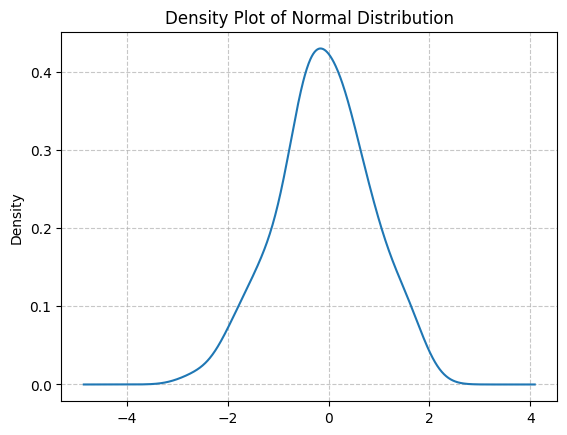

In [9]:
# Create a basic density plot
ax = s.plot.density(title='Density Plot of Normal Distribution')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

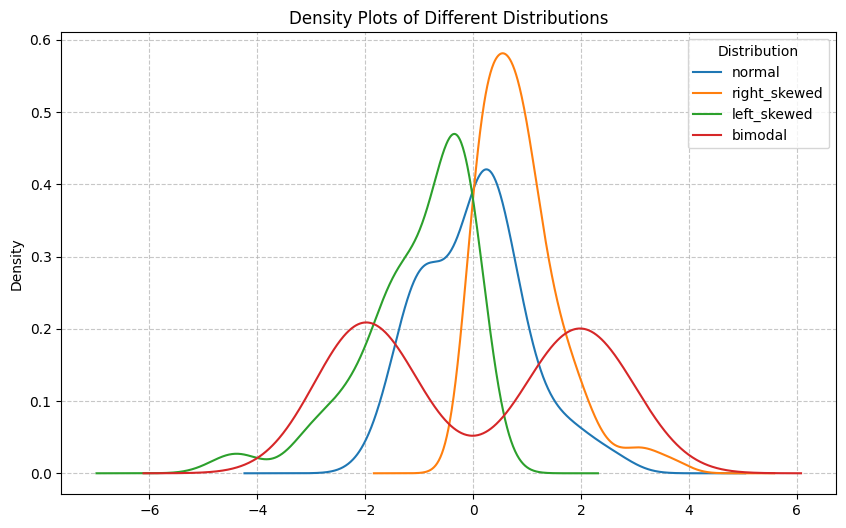

In [10]:
# Create density plots for different distributions
ax = df_skewed.plot.density(
    title='Density Plots of Different Distributions',
    figsize=(10, 6)
)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Distribution')
plt.show()

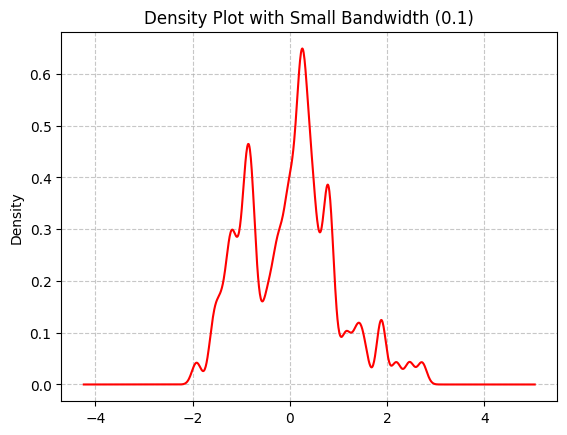

In [11]:
# Create a density plot with small bandwidth (potential over-fitting)
ax = df_skewed['normal'].plot.density(
    bw_method=0.1,
    title='Density Plot with Small Bandwidth (0.1)',
    color='red'
)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

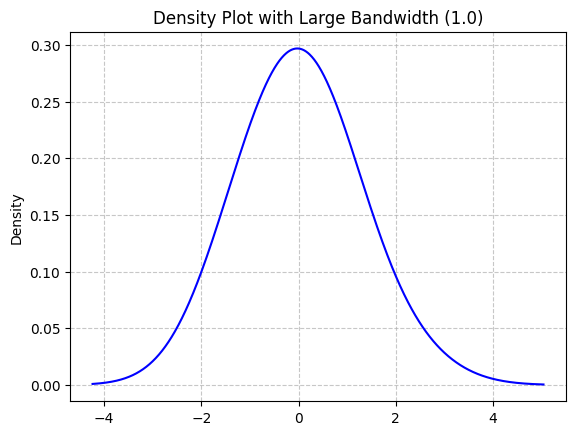

In [12]:
# Create a density plot with large bandwidth (potential under-fitting)
ax = df_skewed['normal'].plot.density(
    bw_method=1.0,
    title='Density Plot with Large Bandwidth (1.0)',
    color='blue'
)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

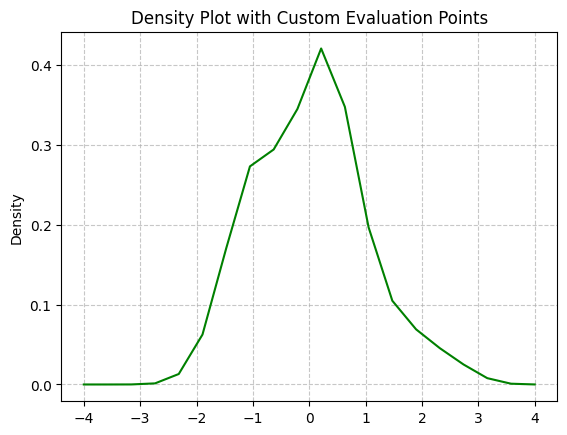

In [13]:
# Create a density plot with custom evaluation points
ax = df_skewed['normal'].plot.density(
    ind=np.linspace(-4, 4, 20),  # 20 evaluation points between -4 and 4
    title='Density Plot with Custom Evaluation Points',
    color='green'
)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

##### Line Plots with `plot.line()`

Line plots are useful for visualizing trends over time or other continuous variables.

In [14]:
# Create a simple Series
s = pd.Series([1, 3, 2])
print("Simple Series:")
print(s)

Simple Series:
0    1
1    3
2    2
dtype: int64


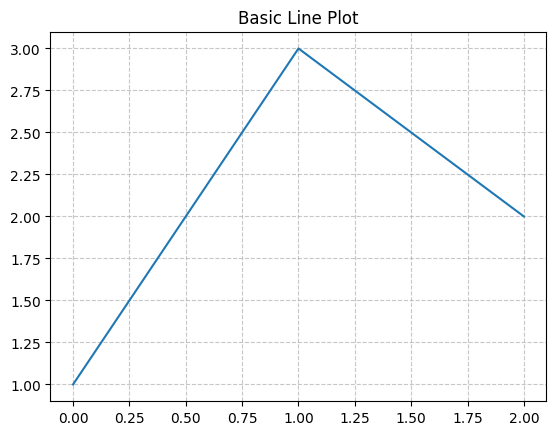

In [15]:
# Create a basic line plot
ax = s.plot.line(title='Basic Line Plot')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [16]:
# Create a DataFrame with animal populations over years
df_animals = pd.DataFrame({
    'pig': [20, 18, 489, 675, 1776],
    'horse': [4, 25, 281, 600, 1900]
}, index=[1990, 1997, 2003, 2009, 2014])
print("Animal populations over years:")
print(df_animals)

Animal populations over years:
       pig  horse
1990    20      4
1997    18     25
2003   489    281
2009   675    600
2014  1776   1900


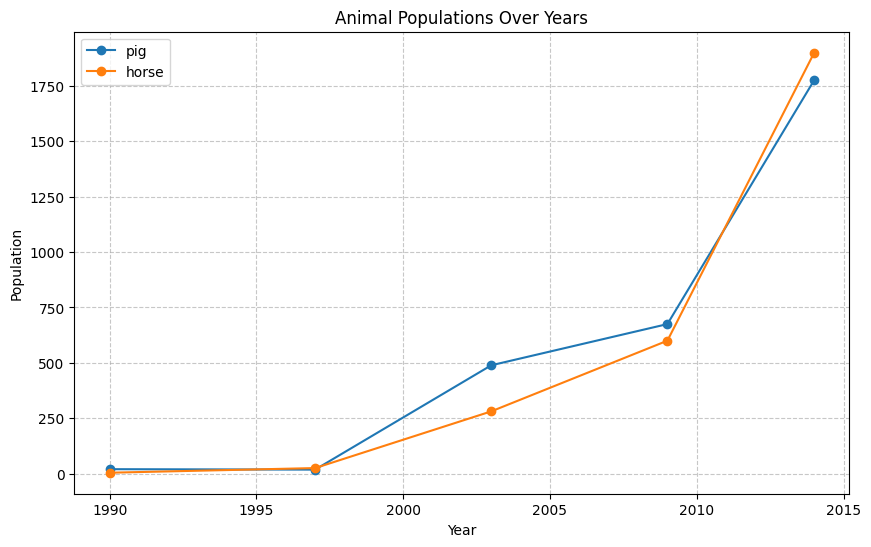

In [17]:
# Create a line plot for the DataFrame
ax = df_animals.plot.line(
    title='Animal Populations Over Years',
    figsize=(10, 6),
    marker='o'
)
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

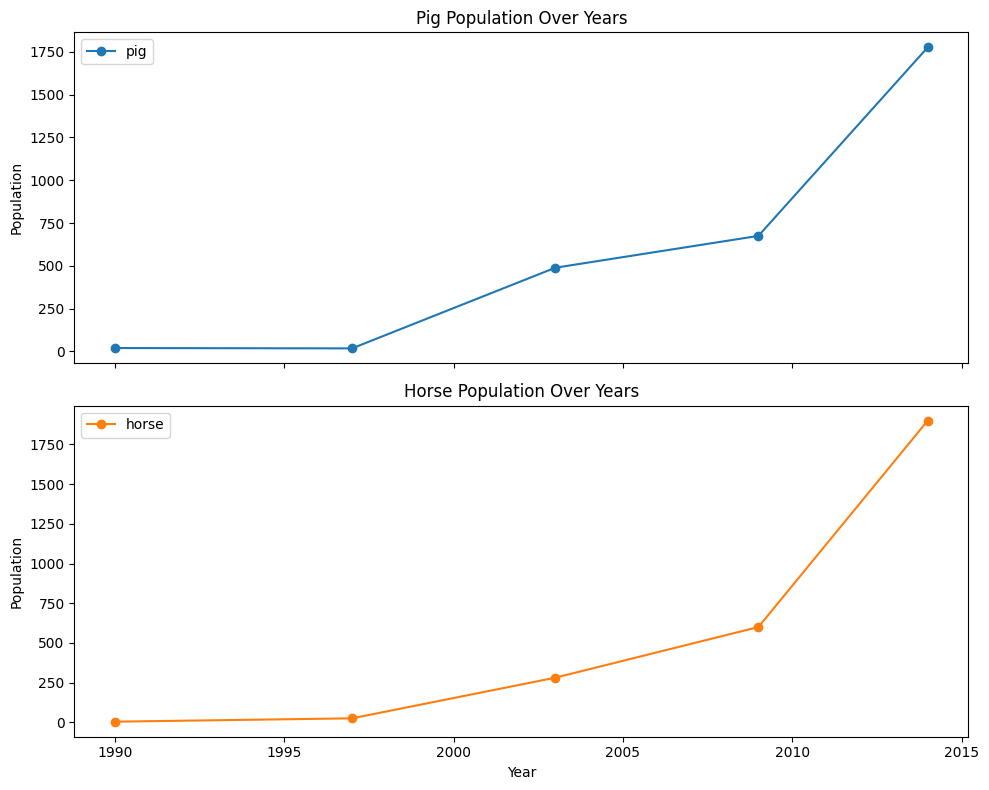

In [19]:
# Create line plots as subplots
axes = df_animals.plot.line(
    subplots=True,
    figsize=(10, 8),
    marker='o',
    layout=(2, 1)
)

# When layout is specified, axes is a 2D array
# For a layout of (2, 1), access elements with axes[0,0] and axes[1,0]
axes[0, 0].set_title('Pig Population Over Years')
axes[0, 0].set_ylabel('Population')
axes[1, 0].set_title('Horse Population Over Years')
axes[1, 0].set_ylabel('Population')
axes[1, 0].set_xlabel('Year')
plt.tight_layout()
plt.show()

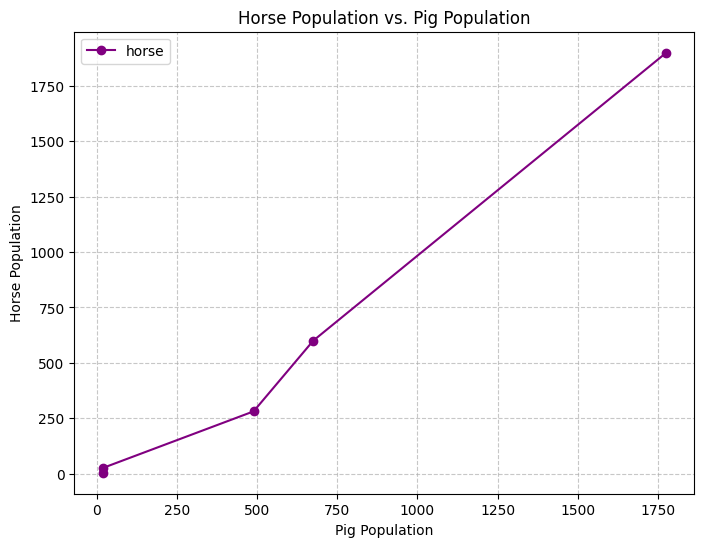

In [20]:
# Create a line plot with one column vs. another
ax = df_animals.plot.line(
    x='pig',
    y='horse',
    title='Horse Population vs. Pig Population',
    figsize=(8, 6),
    marker='o',
    color='purple'
)
plt.xlabel('Pig Population')
plt.ylabel('Horse Population')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

##### Pie Charts with `plot.pie()`

Pie charts are a proportional representation of the numerical data in a column.

In [21]:
# Create a Series for a pie chart
s = pd.Series([25, 35, 15, 25], index=['Apples', 'Bananas', 'Cherries', 'Dates'], name='Fruits')
print("Series for pie chart:")
print(s)

Series for pie chart:
Apples      25
Bananas     35
Cherries    15
Dates       25
Name: Fruits, dtype: int64


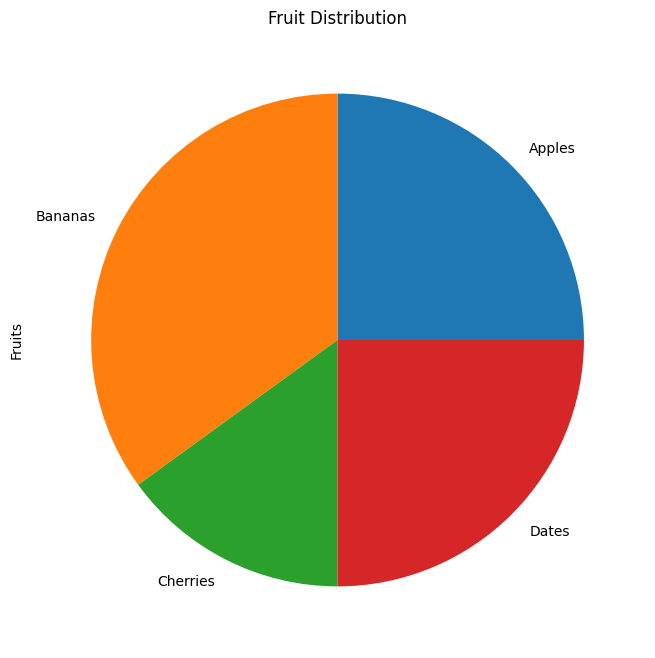

In [22]:
# Create a basic pie chart
ax = s.plot.pie(
    title='Fruit Distribution',
    figsize=(8, 8)
)
plt.show()

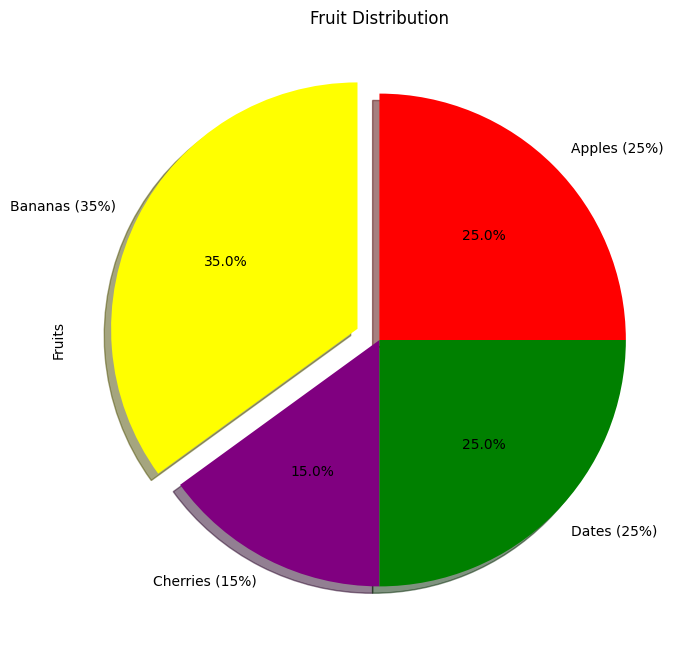

In [23]:
# Create a pie chart with custom colors and labels
ax = s.plot.pie(
    title='Fruit Distribution',
    figsize=(8, 8),
    colors=['red', 'yellow', 'purple', 'green'],
    labels=['Apples (25%)', 'Bananas (35%)', 'Cherries (15%)', 'Dates (25%)'],
    autopct='%.1f%%',
    shadow=True,
    explode=[0, 0.1, 0, 0]  # Explode the second slice (Bananas)
)
plt.show()

In [24]:
# Create a DataFrame for pie charts
df_fruits = pd.DataFrame({
    'Fruits': [25, 35, 15, 25],
    'Vegetables': [20, 30, 25, 25]
}, index=['Store 1', 'Store 2', 'Store 3', 'Store 4'])
print("DataFrame for pie charts:")
print(df_fruits)

DataFrame for pie charts:
         Fruits  Vegetables
Store 1      25          20
Store 2      35          30
Store 3      15          25
Store 4      25          25


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

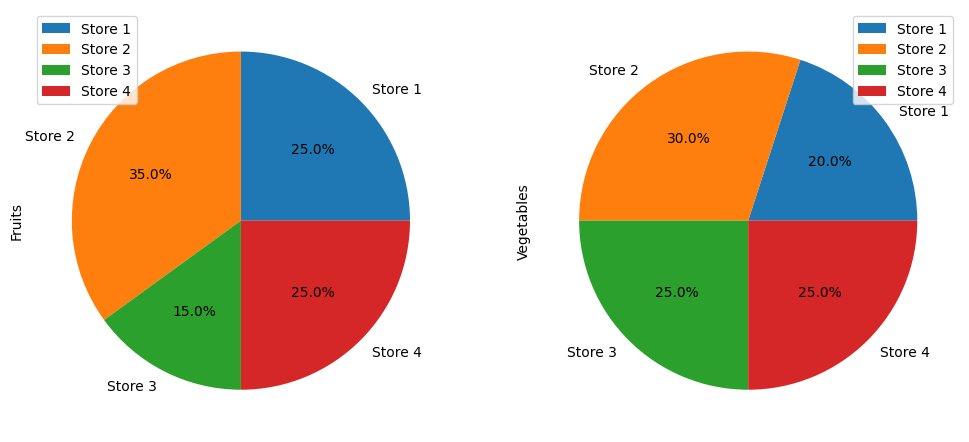

In [25]:
# Create pie charts as subplots
axes = df_fruits.plot.pie(
    subplots=True,
    figsize=(12, 6),
    autopct='%.1f%%',
    layout=(1, 2)
)
axes[0].set_title('Fruit Distribution by Store')
axes[1].set_title('Vegetable Distribution by Store')
plt.tight_layout()
plt.show()

##### Conclusion

In this notebook, we've explored various plotting methods in pandas:

1. **Box Plots (`plot.box()`)**: Useful for visualizing the distribution of data through quartiles, identifying outliers, and comparing distributions across different groups.

2. **Density Plots (`plot.density()`)**: Helpful for visualizing the distribution of continuous data, estimating probability density functions, and comparing different distributions.

3. **Line Plots (`plot.line()`)**: Excellent for visualizing trends over time, relationships between variables, and continuous data series.

4. **Pie Charts (`plot.pie()`)**: Good for showing proportional or percentage data, especially when the number of categories is small.

These plotting methods are built on top of matplotlib and provide a convenient interface for visualizing pandas data structures. They offer a wide range of customization options and are essential tools for exploratory data analysis and data visualization in pandas.